In [1]:
import numpy as np
from matplotlib import pyplot as plt
from my_utils import *
import pandas as pd

import WP254HD as lecroy
lecroy.init("192.168.0.103")


*IDN?
LECROY,WP254HD,LCRY4608N02556,9.7.0
successfully connected to Lecroy scope!


1

In [2]:
##################################################
##           configure LeCroy Scope             ##
##################################################

#lecroy.clear_all()

# set horizontal scaling, time/div
#tdiv=50e-9
#lecroy.set_tdiv(tdiv)

#lecroy.set_trigger_delay(-4*tdiv) # t0 = 10% of screen

# access scope channels by labels,
# for easy re-mapping of scope channels without
# touching your below measurement automation
s = {
    "DUT_IN"   :"C3", 
    "DUT_OUT"  :"C2"  
}

# access scope measurements by labels
m = {
    "AREA"   : "p6",
    "WIDTH"  : "p7",
}

# set up measurements for rise time, fall time and pulse width
#lecroy.setup_measurement(m["DUT_OUT_FALL"],  s["DUT_OUT"], "rise")
#lecroy.setup_measurement(m["DUT_OUT_RISE"],  s["DUT_OUT"], "fall")
#lecroy.setup_measurement(m["DUT_OUT_WIDTH"], s["DUT_OUT"], "width")

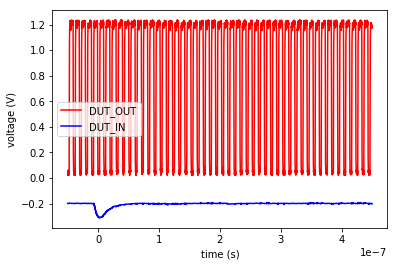

In [17]:
##################################################
##              capture waveforms               ##
##################################################

time, wfm = lecroy.capture_waveforms([
    s["DUT_IN"],
    s["DUT_OUT"]
  ],
    average=1
)

plt.plot(time, wfm[s["DUT_OUT"]],"red" ,label="DUT_OUT")
plt.plot(time, wfm[s["DUT_IN"]]-0.5, "blue" ,label="DUT_IN")
plt.legend()
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")
plt.show()

In [14]:
##################################################
##          use built-in measurements           ##
##################################################

n_samples = 1000

vals = lecroy.measure_statistics([m["AREA"],m["WIDTH"]],n_samples)

In [26]:
areas  = vals[m["AREA"]]
widths = vals[m["WIDTH"]]

Q      = -areas/50 # areas are in Wb = Vs, divide by Z_in to get charge
delta_t = widths-300e-9

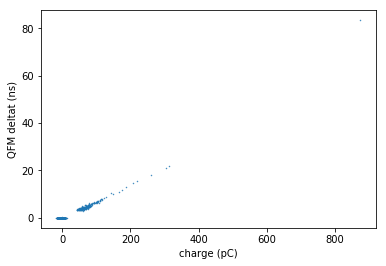

In [27]:
plt.scatter(Q*1e12,delta_t*1e9,s=0.2)
plt.xlabel("charge (pC)")
plt.ylabel("QFM deltat (ns)")
plt.show()

In [19]:
# fresh dataframe
df = pd.DataFrame()

In [ ]:
##################################################
##                recording loop                ##
##################################################

n_samples = 10000





for i in range(10000):
    print("run no:")
    print(i)
    
    vals = lecroy.measure_statistics([m["AREA"],m["WIDTH"]],n_samples)
    areas  = vals[m["AREA"]]
    widths = vals[m["WIDTH"]]

    Q      = -areas/50 # areas are in Wb = Vs, divide by Z_in to get charge
    delta_t = widths-300e-9
    
    # only store if you measured at least 1 ns worth of charge
    mask = delta_t > 1e-9
    
    Q = Q[mask]
    delta_t = delta_t[mask]
    
    
    df = df.append(pd.DataFrame({
        "Q" : Q,
        "delta_t" : delta_t
    }),ignore_index=True)
    pickle_this(df,"measured_data")
    


run no:
0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


saving to /workdir/jupyter/misc_mw/2022-06_QFM_crystal_area_width_correlation/QFM_compare_to_integral_record_data/QFM_data.pickle
run no:
1
